In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

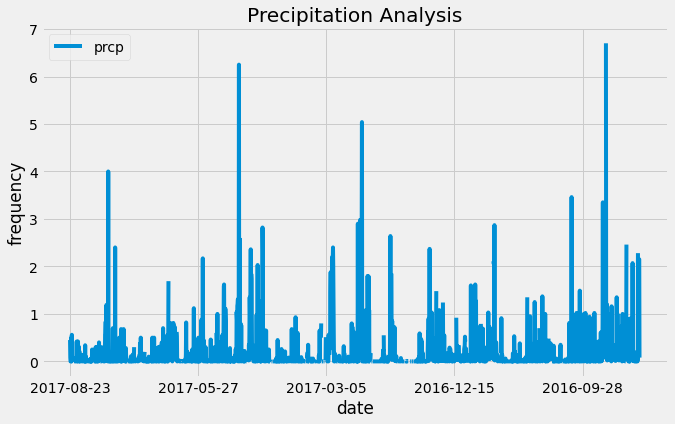

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
recent_year = session.query(Measurement.date).order_by(Measurement.date.desc())
recent_year = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(5).all()
recent_year

# Calculate the date 1 year ago from the last data point in the database
last_date = dt.date(2017,8,23) - dt.timedelta(days=365)
last_date
# Perform a query to retrieve the data and precipitation scores
all_dates = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > last_date).all()
all_dates
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(all_dates)
prcp_df.head()
prcp_df = prcp_df.set_index('date')
prcp_df
# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=False)
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(figsize=(10,6))
ax.set_title("Precipitation Analysis")
ax.set_ylabel('frequency')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df = prcp_df.describe()
prcp_df

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
available = session.query(Measurement.station).group_by(Measurement.station).count()
print(f'there are {available} available stations in this dataset')

there are 9 available stations in this dataset


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc())
for station in  most_active:
    print(station)
# most_active 
most_active[0][0]

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


'USC00519281'

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temps_obs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs ), func.avg(Measurement.tobs)).\
                            filter(Measurement.station == most_active[0][0])
                            
temps_obs[0]

(54.0, 85.0, 71.66378066378067)

In [20]:
# Query the last 12 months of temperature observation data for this station and store as Dataframe
temps_obs = session.query((Measurement.tobs),(Measurement.date)).\
                            filter(Measurement.station == most_active[0][0]).\
                            filter(Measurement.date >= last_date).all()
temps_obs

temps_obs_df = pd.DataFrame(temps_obs)                   
temps_obs_df                      


,tobs,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


<function matplotlib.pyplot.show(*args, **kw)>

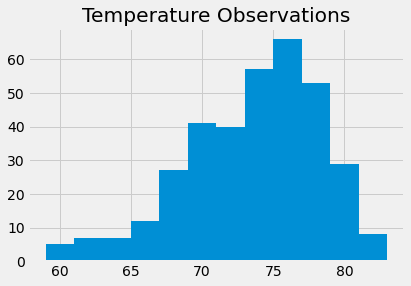

In [22]:
plt.hist(temps_obs_df['tobs'], bins = 12)
# or 
# temp_obs_df.plt(kind ='hist',bins = 12)
plt.xlabel('')
plt.ylabel('')
plt.title('Temperature Observations')
plt.show

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
